# 5 Practical Skill 1 -- Array Operations

## 5.1 Brief of Data Wrangling Tools with Discussion on When to Use Which

### 5.1.1 Small arrays and tables

Arrays are a very generic representation of the data. When an array is 2D,  it is often called a table. Usually, each row of a table represent one data sample, and each column of the table corresponds to one attribute of the data. Table data is perhaps the most the common simplest format of data. if all the values in the table are numerical,  and especially when we want to perform computations on the table a `numpy` array (see next subsection for details) is a convenient choice.

On the other hand, a pandas dataframe should be considered if
- the types of the values in the table are different,  or
- we needed to deal with issues such as missing values,  or
- It is convenient in the analysis to refer to the meaning of the attributes,  such as instead of being called “attribute-2”,  we want to call the attribute “petal_length”.

An example of table data is the basic machine learning dataset "Iris".

Note in the following example, `seaborn` is an accompany library facilitating quick prototyping and visualisation / inspection of `DataFrames` of the `pandas` library.

In [2]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Alternatively, if we manage the data in numpy arrays

In [ ]:
from sklearn.datasets import load_iris

iris_np = load_iris()
print(iris_np.data.shape)
print(iris_np.data[:5])
print(iris_np.target[:5])

### 5.1.2 Homogeneous Arrays

When the data contains large amount of attributes, those attributes are organised in a spatially regular and meaningful way, then we use typical numerical multidimensional arrays. 

The numerical computaiton library `numpy` provides convenient interfaces to efficient computation tools of manipulating arrays. Check the [online document][numpy-doc] for more details.

[numpy-doc]:https://www.numpy.org/

> Numpy has a sister library, `scipy`, which contains higher level (overlapping to an extent) functions. E.g. `numpy` performs linear algebric operators, e.g. compute $C$ in $A \times B \rightarrow C$, where $A$  and $B$ are matrices or vectors, while `scipy` can do the inverse computation, i.e. finding out $A$, where $A \times B \rightarrow C$)


#### Example of image pixels

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_images
ims = load_sample_images()
print(ims.images[0].shape, ims.images[1].shape)
images = np.stack(ims.images)
print(images.shape)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(images[0])
plt.show()
plt.imshow(images[1])
plt.show()

NameError: name 'images' is not defined

Let's apply a partial blue-filter and a total red filter to the two images.

In [ ]:
images[0][100:150, 100:500, 0:2] = 0
plt.imshow(images[0])
plt.show()
images[1][:, :, 1:] = 0
plt.imshow(images[1])
plt.show()

## 5.2 Advanced Array Operations

### 5.2.1 Indexing

The following code is a simple visualiser.

In [ ]:
def show_array(a):
    if a.ndim == 1: 
        a = a[:, np.newaxis]
    fig, axes = plt.subplots(1)
    fig.set_size_inches(a.shape[1]/2, a.shape[0]/2)
    axes.imshow(a)
    axes.set_xticks(np.arange(a.shape[1]))
    axes.set_yticks(np.arange(a.shape[0]))

Study the following example, and perform the following exercise.

In [ ]:
a = np.zeros((10, 1))
a[5:8]=1
show_array(a)

a = np.zeros((10, 1))
a[3:8:2]=1
show_array(a)

__EXERCISE__

In [ ]:
# Replace ... to produce (1) and (2) (in two experiments)
a = np.zeros((10, 1))
a[...]=1
show_array(a)

In [ ]:
# Replace ... to produce (3) and (4) (in two experiments)
a = np.zeros((10, 10))
a[1::3, ::2]=1
show_array(a)

In [9]:
# Consider the `im` array
ims = load_sample_images()
im = ims.images[0][:,:, 0]/255
plt.imshow(im, cmap="gray")
plt.show()

# Explain what you see in im_h
im_h = im[:, 1:] - im[:, :-1]
plt.imshow(im_h, cmap="gray", vmax=1.0, vmin=-1.0)
plt.show()

NameError: name 'load_sample_images' is not defined

### 5.2.2 Reducing and Broadcasting

Reducing refers to some operation that summarise the values along a dimension, and store the result in a new array.  The new array will have one less dimension than the original one has. The summarisation operation include some often encountered ones such as taking the mean value or finding the median value or taking the minimum or maximum.

In [1]:
# E.g. get the mean of each attribute of Iris Data
from sklearn.datasets import load_iris

iris_np = load_iris()
iris_attr_mean = iris_np.data.mean(axis=0)
print(iris_attr_mean)

[5.84333333 3.054      3.75866667 1.19866667]


__EXERCISE__

Compute the max and min value of each attribute of the Iris dataset.

Broadcasting is an easy way to specify element-wise computation between two arrays.  In a sense, the correspondence between a large array and a small array in broadcasting mirrors the relationship between the two arrays in reducing. Please check the document or a [tutorial][bd-tut] for more detials.

[bd-tut]:https://www.tutorialspoint.com/numpy/numpy_broadcasting.htm

In [10]:
# E.g. to take off the minimum value of each attribute from each data sample in Iris, so in the processed data 
# the minimum value of each attribute is 0.

iris_np_zero_min = iris_np.data - iris_np.data.min(axis=0)

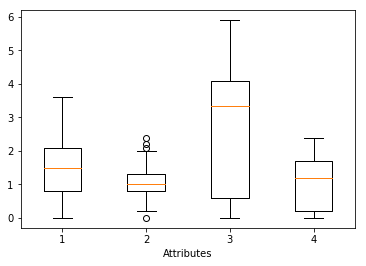

In [12]:
plt.boxplot(iris_np_zero_min)
plt.xlabel("Attributes")
plt.show() # Note the absolute minimum value of each attribute.

__EXERCISE__

Normalise the iris data so that each attribute is between $[0, 1]$.

HINT: the range is `max - min`.